In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\himmu\\Downloads\\data science project\\python projects\\project 3\\healthcare_dataset.csv")
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
data[['Age', 'Billing Amount']].describe() # to get the summary statistics of the data

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [12]:
data.shape

(55500, 15)

In [ ]:
data.head()

In [13]:
data['Name'] = data['Name'].str.capitalize()

In [143]:
age_group = pd.cut(data["Age"],bins=[13,25,40,60,90],labels = ["13-25","26-40","41-60","61-90"])
age_group

0        26-40
1        61-90
2        61-90
3        26-40
4        41-60
         ...  
55495    41-60
55496    61-90
55497    26-40
55498    41-60
55499    41-60
Name: Age, Length: 55500, dtype: category
Categories (4, object): ['13-25' < '26-40' < '41-60' < '61-90']

In [ ]:
# Reorder columns to place age_group next to Age
cols = list(data.columns)
cols.insert(cols.index('Age') + 1, cols.pop(cols.index('age_group')))
data = data[cols]
data.head() 

1. cols.index('Age') finds the index position of the "Age" column.
2. cols.index('Age') + 1 determines the position right after the "Age" column.
3. cols.pop(cols.index('age_group'))
4. cols.index('age_group') finds the index of "age_group".
5. cols.pop(...) removes "age_group" from its current position and returns it.
6. cols.insert(...) inserts "age_group" into the new position right after "Age".

In [132]:
data = pd.DataFrame(data)

In [133]:
medical_condition = data["Medical Condition"].value_counts().sort_values(ascending=False)
medical_condition

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

which Disease most in patient
 

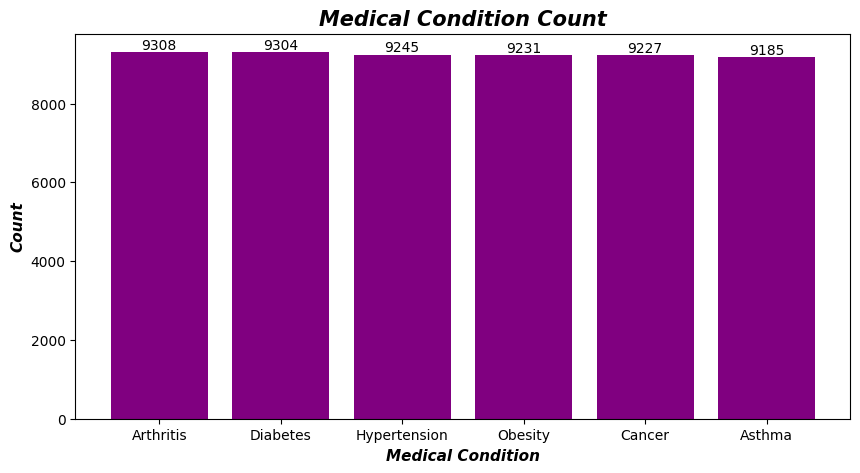

In [274]:
plt.figure(figsize=(10,5))

bars = plt.bar(medical_condition.index,medical_condition.values,color="purple")

plt.xlabel("Medical Condition",fontweight = "bold",fontsize=11,fontstyle="oblique")# fontstyle :'normal', 'italic', 'oblique
plt.ylabel("Count",fontweight = "bold",fontsize=11,fontstyle="italic")
plt.title("Medical Condition Count",fontweight = "bold",fontsize=15,fontstyle="italic")
plt.xticks(rotation=360,fontweight="normal") # rotate x-axis labels
plt.yticks(fontweight="light") 
plt.bar_label(bars,fontweight = "light",color="black")

plt.show()

In [134]:
# if i want to check the count of a specific medical condition
Arthritis = data[data["Medical Condition"] == "Arthritis"]["Medical Condition"].value_counts() 
Arthritis

Medical Condition
Arthritis    9308
Name: count, dtype: int64

In [135]:
gender = data["Gender"].value_counts().sort_values(ascending=False)
gender

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [276]:
count = data.groupby("age_group", observed=False)["Medical Condition"].value_counts()# observed=False is used to include all categories in the data, even if none of the data is in that category.
count = count.loc["13-25"] # .loc[] is used to access rows (or columns) by label rather than position.
count

Medical Condition
Obesity         1108
Diabetes        1091
Asthma          1084
Cancer          1084
Arthritis       1082
Hypertension    1082
Name: count, dtype: int64

which medical condition is most in 13-25 age group people

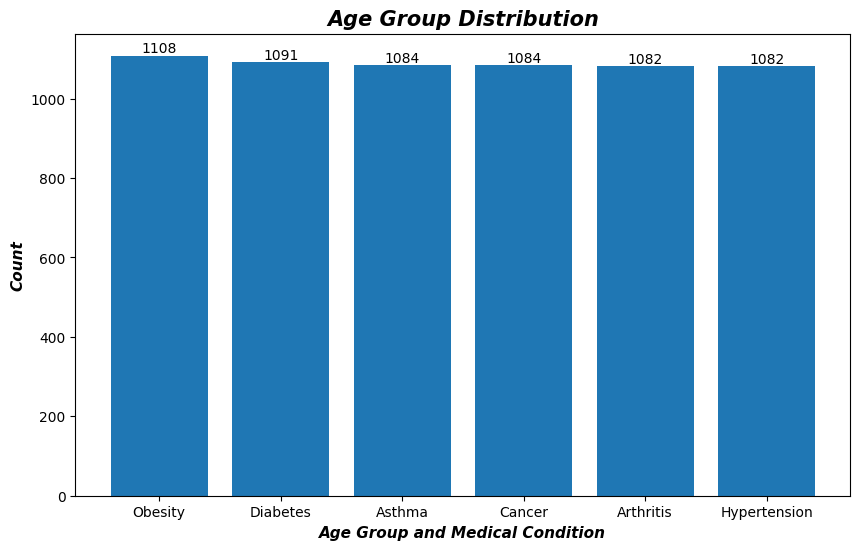

In [277]:
plt.figure(figsize=(10,6))

bars = plt.bar(count.index,count.values)

plt.title('Age Group Distribution',fontweight = "bold",fontsize=15,fontstyle="italic")
plt.xlabel("Age Group and Medical Condition",fontweight = "bold",fontsize=11,fontstyle="italic")
plt.ylabel("Count",fontweight = "bold",fontsize=11,fontstyle="italic")
plt.bar_label(bars)

plt.show()

which medical condition is most in 26-40 age group people

In [279]:
count = data.groupby("age_group", observed=False)["Medical Condition"].value_counts()# observed=False is used to include all categories in the data, even if none of the data is in that category.
count_1 = count.loc["26-40"] # .loc[] is used to access rows (or columns) by label rather than position.
count_1

Medical Condition
Arthritis       2049
Cancer          2026
Asthma          2017
Obesity         2000
Diabetes        1995
Hypertension    1992
Name: count, dtype: int64

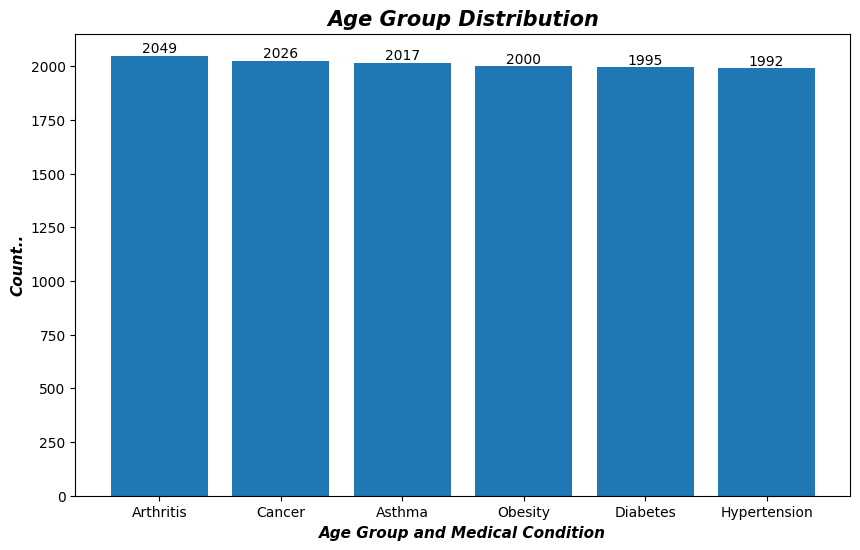

In [280]:
plt.figure(figsize=(10,6))

bars = plt.bar(count_1.index,count_1.values)

plt.title('Age Group Distribution',fontweight = "bold",fontsize=15,fontstyle="italic")
plt.xlabel("Age Group and Medical Condition",fontweight = "bold",fontsize=11,fontstyle="italic")
plt.ylabel("Count..",fontweight = "bold",fontsize=11,fontstyle="italic")
plt.bar_label(bars)

plt.show()

which medical condition is most in 41-60 age group people

In [281]:
count = data.groupby("age_group",observed=False)["Medical Condition"].value_counts()
count_2 = count.loc["41-60"]
count_2

Medical Condition
Obesity         2802
Diabetes        2799
Arthritis       2781
Hypertension    2743
Cancer          2727
Asthma          2654
Name: count, dtype: int64

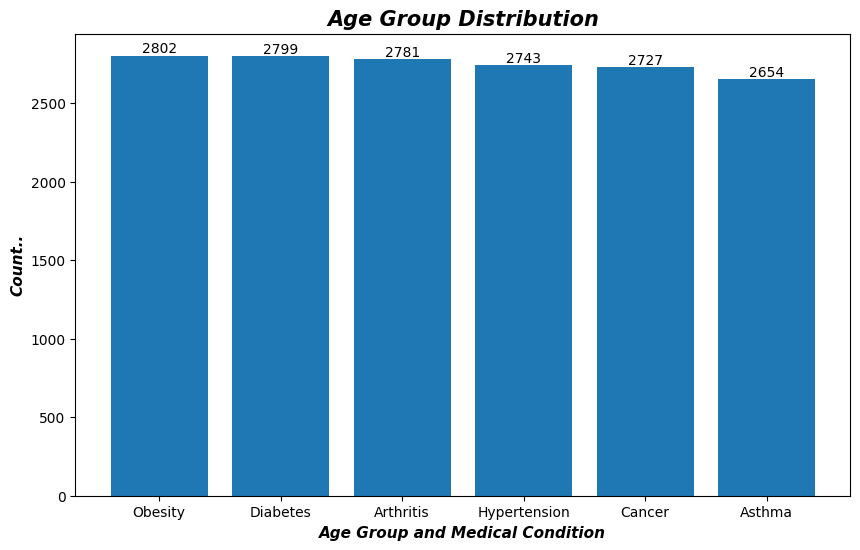

In [282]:
plt.figure(figsize=(10,6))

bars = plt.bar(count_2.index,count_2.values)

plt.title('Age Group Distribution',fontweight = "bold",fontsize=15,fontstyle="italic")
plt.xlabel("Age Group and Medical Condition",fontweight = "bold",fontsize=11,fontstyle="italic")
plt.ylabel("Count..",fontweight = "bold",fontsize=11,fontstyle="italic")
plt.bar_label(bars)

plt.show()

which medical condition is most in 61-90 age group people

In [227]:
count = data.groupby("age_group",observed=False)["Medical Condition"].value_counts()
count_3 = count.loc["61-90"]
count_3

Medical Condition
Asthma          3427
Hypertension    3427
Diabetes        3419
Arthritis       3394
Cancer          3388
Obesity         3315
Name: count, dtype: int64

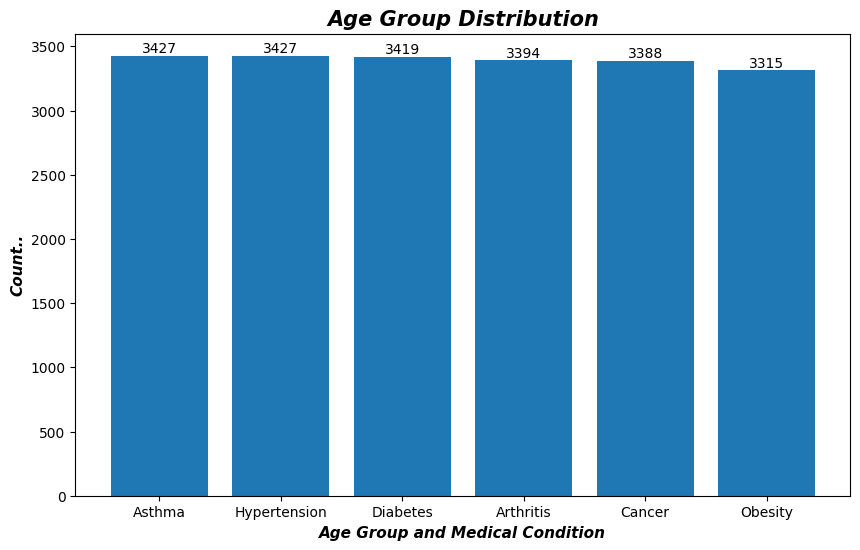

In [283]:
plt.figure(figsize=(10,6))

bars = plt.bar(count_3.index,count_3.values)

plt.title('Age Group Distribution',fontweight = "bold",fontsize=15,fontstyle="italic")
plt.xlabel("Age Group and Medical Condition",fontweight = "bold",fontsize=11,fontstyle="italic")
plt.ylabel("Count..",fontweight = "bold",fontsize=11,fontstyle="italic")
plt.bar_label(bars)

plt.show()

In [261]:
gen_medical_condition = data.groupby("Gender")["Medical Condition"].value_counts()
gen_medical_condition_1 = gen_medical_condition.loc["Female"]
gen_medical_condition_1

Medical Condition
Arthritis       4686
Diabetes        4651
Obesity         4622
Hypertension    4612
Cancer          4602
Asthma          4553
Name: count, dtype: int64

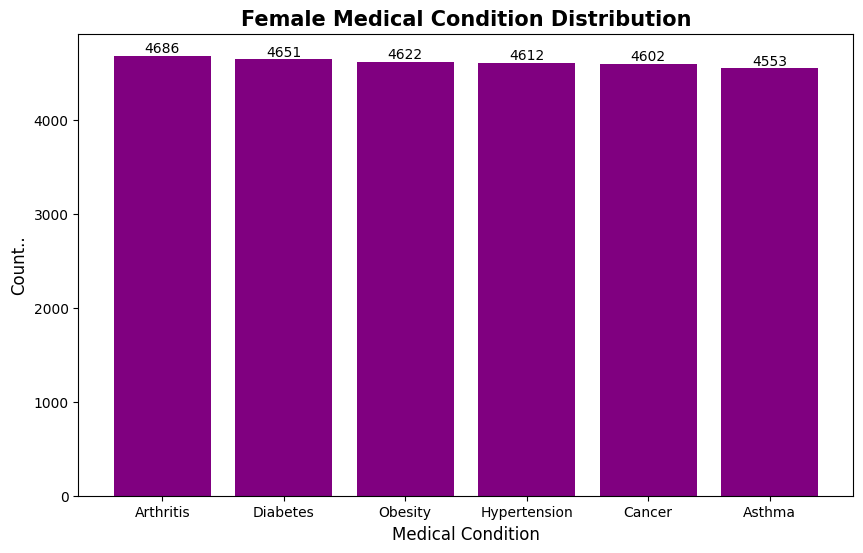

In [269]:
plt.figure(figsize=(10,6))

bars = plt.bar(gen_medical_condition_1.index,gen_medical_condition_1.values,color='purple')

plt.title("Female Medical Condition Distribution",fontsize=15,fontweight='bold')
plt.xlabel("Medical Condition",fontsize=12)
plt.ylabel("Count..",fontsize=12)
plt.bar_label(bars)

plt.show()

In [271]:
gen_medical_condition = data.groupby("Gender")["Medical Condition"].value_counts()
gen_medical_condition_2 = gen_medical_condition.loc["Male"]
gen_medical_condition_2

Medical Condition
Diabetes        4653
Hypertension    4633
Asthma          4632
Cancer          4625
Arthritis       4622
Obesity         4609
Name: count, dtype: int64

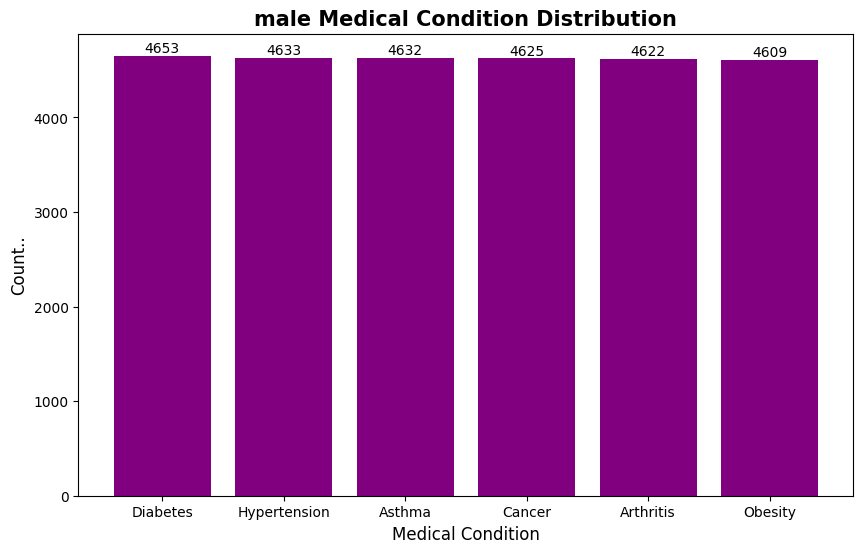

In [272]:
plt.figure(figsize=(10,6))

bars = plt.bar(gen_medical_condition_2.index,gen_medical_condition_2.values,color='purple')

plt.title("male Medical Condition Distribution",fontsize=15,fontweight='bold')
plt.xlabel("Medical Condition",fontsize=12)
plt.ylabel("Count..",fontsize=12)
plt.bar_label(bars)

plt.show()

count of blood group people 

In [289]:
count_blood_type = data["Blood Type"].value_counts().sort_values(ascending=False)
count_blood_type

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [291]:
data.head()

,Name,Age,age_group,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,26-40,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,61-90,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,61-90,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,26-40,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,41-60,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


split date column into year column 


In [ ]:
data["year"] = data["Date of Admission"].str.split("-").str[0] # to extract the year from the date of admission
data.head()

split date column into month & convert month no with name values

In [ ]:
data["month"] = data["Date of Admission"].str.split("-").str[1]# to extract the month from the date of admission
convert = {"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"June","07":"July","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec"}
data["month"] = data["month"].replace(convert)
data.head()

admission per year in hospital

In [ ]:
year = data["year"].value_counts().sort_index()
year

year
2019     7387
2020    11285
2021    10931
2022    11017
2023    11026
2024     3854
Name: count, dtype: int64

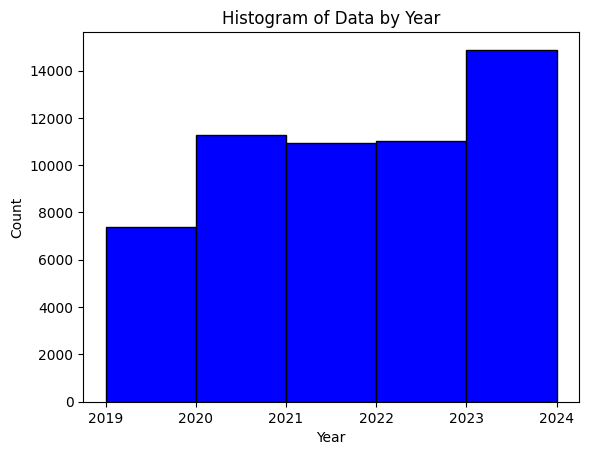

In [ ]:
bins = [2019, 2020, 2021, 2022, 2023, 2024]

plt.hist(data["year"], bins=bins, color='blue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Data by Year')

# Show the plot
plt.show()

in which month in 2019 most patient admit

In [343]:
most_admission_month = data.groupby("year")["month"].value_counts().sort_values(ascending=False)
most_admission_month = most_admission_month.loc["2019"]
most_admission_month

month
Oct     1013
Aug     1001
Nov      959
July     957
Sep      936
Dec      928
June     907
May      686
Name: count, dtype: int64

in which month in 2020 most patient admit

In [345]:
most_admission_month_2020 = data.groupby("year")["month"].value_counts().sort_values(ascending=False)
most_admission_month_2020 = most_admission_month_2020.loc["2020"]
most_admission_month_2020

month
Aug     1014
July    1007
May      978
Oct      962
Jan      950
Mar      937
June     935
Apr      924
Sep      904
Nov      904
Dec      889
Feb      881
Name: count, dtype: int64

In [349]:
admission_type = data["Admission Type"].value_counts()
admission_type

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

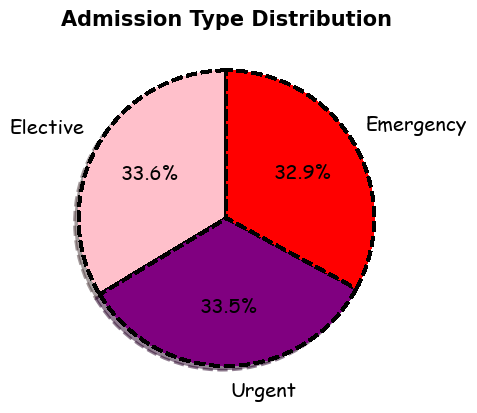

In [366]:
plt.pie(admission_type,labels=admission_type.index,autopct="%1.1f%%",startangle=90,shadow=True,colors=["pink","purple","red"],radius=1,
textprops={"fontsize":"x-large","color":"black","fontweight":"light","family":"cursive","rotation":0},counterclock=True,
wedgeprops={"edgecolor":"black","linewidth":2,"linestyle" : "--","antialiased":False,"fill":True},rotatelabels=2)

plt.title("Admission Type Distribution",fontsize=15,fontweight="bold")

plt.show()

In [369]:
ins = data["Insurance Provider"].value_counts()
ins

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

which Insurance Provider give insurance to patient

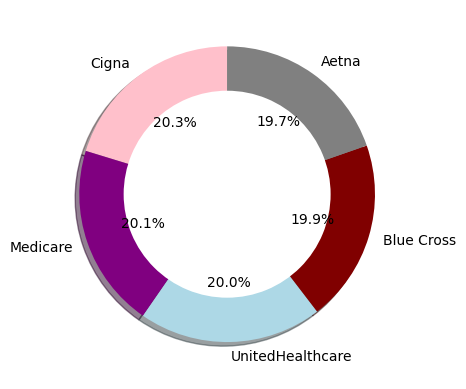

In [377]:
plt.pie(ins,labels=ins.index,autopct="%1.1f%%",startangle=90,shadow=True,colors=["pink","purple","lightblue","maroon","gray"],radius=1)
plt.pie(x=[1],radius=0.7,colors=["white"])

plt.show()

In [378]:
data.head()

,Name,Age,age_group,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,year,month
0,Bobby JacksOn,30,26-40,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2024,Jan
1,LesLie TErRy,62,61-90,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,2019,Aug
2,DaNnY sMitH,76,61-90,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,2022,Sep
3,andrEw waTtS,28,26-40,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,2020,Nov
4,adrIENNE bEll,43,41-60,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,2022,Sep


In [381]:
avg_patient_day = data.groupby("Date of Admission")["Discharge Date"].count()
avg_patient_day 

Date of Admission
2019-05-08    27
2019-05-09    38
2019-05-10    17
2019-05-11    25
2019-05-12    36
              ..
2024-05-03    31
2024-05-04    24
2024-05-05    26
2024-05-06    33
2024-05-07    33
Name: Discharge Date, Length: 1827, dtype: int64